# Problem 3: complex down-conversion
<!--
In problem 2 we observed that a sinusoid $x(t) = A \cdot \cos(\omega \cdot t + \phi )$ with unknown phase and magnitude can be decomposed into pure sine and cosine terms by calculating the inner product between $x(t)$ and a sine and cosine function respectively. Based on the sine and cosine terms it is then possible to calculate the magnitude and phase $x(t)$. 


This can be summarized with the following equation

$$
\begin{align}
x(t) &= A \cdot \cos\left(\omega \cdot t + \phi\right)\\
&= A_x \cdot \cos(\omega \cdot t) + A_y \cdot \sin(\omega \cdot t) \\ &\vdots \\
A_x &= 2\cdot \frac{1}{T} \int_{0}^{T} x(t) \cdot \cos(\omega \cdot t) dt, \ \ \ \ T = \frac{2\pi}{\omega} \\
A_y &= 2\cdot \frac{1}{T} \int_{0}^{T} x(t) \cdot \sin(\omega \cdot t) dt, \ \ \ \ T = \frac{2\pi}{\omega} \\ \vdots \\
A &= \sqrt{A_x^2 + A_y^2} \\
\phi &= \tan^{-1} \left(\frac{A_y}{A_x}\right)
\end{align}
$$

where $T$ is one wave period of the sinusoid.-->

<!--
$$
\begin{align}
\boldsymbol{A} &= A \cdot e^{j \cdot \phi} \\
&= A_x - j\cdot A_y \\
&= 2 \cdot \frac{1}{T} \int_{0}^{T} x(t) \cdot \cos(\omega \cdot t) dt - 2j \cdot \frac{1}{T} \int_{0}^{T} x(t) \cdot \cos(\omega \cdot t) dt \\
&= 2 \cdot \frac{1}{T} \int_{0}^{T} x(t) \cdot \left( \cos(\omega \cdot t) - 2j \cdot \sin(\omega \cdot t)\right) dt\\
&= 2 \cdot \frac{1}{T} \int_{0}^{T}  x(t) \cdot e^{-j \omega \cdot t} dt
\end{align}
$$
-->

### An introduction to two-sided frequency spectrums

In problem 2 we observed that a sinusoid $x(t) = A \cdot \cos(\omega \cdot t + \phi )$ with unknown phase and magnitude can be decomposed into pure sine and cosine terms by multiplying $x(t)$ by a sine and cosine function respectively. This process is called **frequency mixing**, which has an interesting effect on the frequency spectrum of $x(t)$. However, to gain a full picture of the effects of frequency mixing, we need to study *both sides* of the spectrum. Somtheing which may not be readily apparent when first encountering the fourier transform (as described in eq. $1$ below, is that there is no mathematical reason the function $X(f)$ representing the signal in the frequency domain, should only be valid for $f \geq 0$.

$$X(f) = \int_{-\infty}^{\infty} x(t)\cdot e^{j2\pi \cdot f \cdot t} dt \tag{1}$$

The idea of *negative frequencies* and a *two-sided frequency spectrum* often seems a bit strange when first introduced. However, for real-valued signals the frequency spectrum will always be complex conjugate symmetric ($X(-f) = X^*(f)$). The key here is that the frequency spectrum $X(f)$ of a signal, being based on the fourier transform, in fact decomposes a signal into *rotating phasors* $\boldsymbol{a} \cdot e^{j\omega \cdot t}$, where $\boldsymbol{a}$ is a complex magnitude. Seeing as the sum of a pair of phasors with opposite directions of rotation add together to form a sinusoid as equation $2$ descirbes, the true magnitude of a sinusoid is found by combining the magnitude of both peaks at frequency $\pm \omega$ in the two-sided frequency spectrum.

$$\cos(\omega \cdot t) = \frac{e^{j\omega \cdot t} + e^{-j \omega \cdot t}}{2} \tag{2}$$

<img src="Figurer/Fig5-4_Euler3D.png" style="width: 40%; margin-left: 25%" />


### Frequency mixing portrayed in the frequency domain
If we use the equation $2$ to calculate the product of a sinusoid with frequency $f_1$, and a sinusoid with frequency $f_2$, we wil end up with 4 rotating phasors: two with frequency $\pm (f_1 + f_2)$ and the other two with angular frequency $\pm(f_1 - f_2)$. The code cell below generates a interactive demonstration of how frequency mixing affects a signal in both the time and frequency domain. Run the cell, and try adjusting the various parameters to see the effects. Take special note of how the product signal has 4 frequency spikes, except when $f_1$ and $f_2$ are the same.

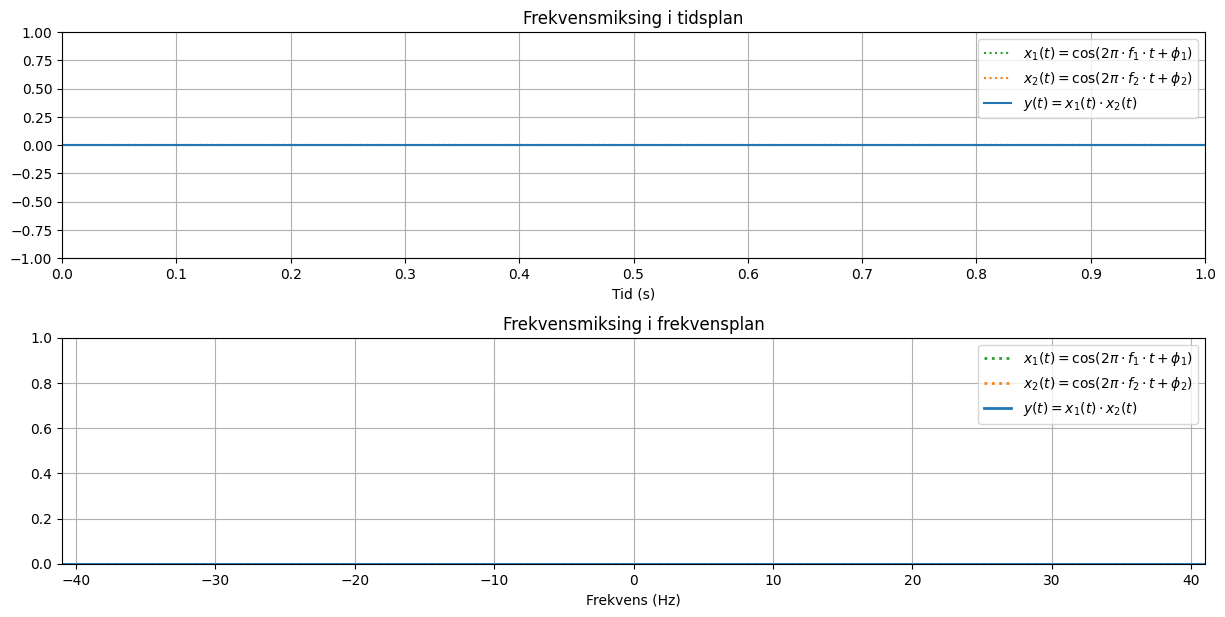

Output()

In [1]:
from demos import FrequencyMixingSpectrumDemo
# %matplotlib ipympl # does not work with this demo
FrequencyMixingSpectrumDemo(fig_num = 1)

Below is a short python script which loads the sinusoid $x(t)$ from the data file `unkown_sinusoid.mat`, and plots it's magnitude spectrum.

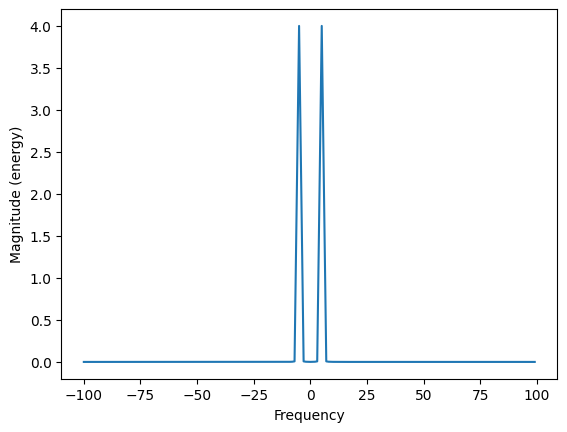

In [2]:
# We begin by loading the signal x(t) once more
from scipy.io import loadmat
import matplotlib.pyplot as plt
file_contents = loadmat("unknown_sinusoid.mat", squeeze_me=True)
fs = file_contents["fs"]
x = file_contents["x"]
t = file_contents["t"]
plt.close(2); plt.figure(2)
plt.magnitude_spectrum(x, Fs=fs, sides="twosided");

## a)
Write a python program which shows the frequency spectrum of $x(t)\cdot \cos(2\pi \cdot 5 \cdot  t)$, and $x(t) \cdot \sin(2\pi \cdot t)$. Can you determine the connection between the center spike (at $f = 0\text{ Hz}$) and the calculated amplitudes $A_x$ and $A_y$ from problem 2?

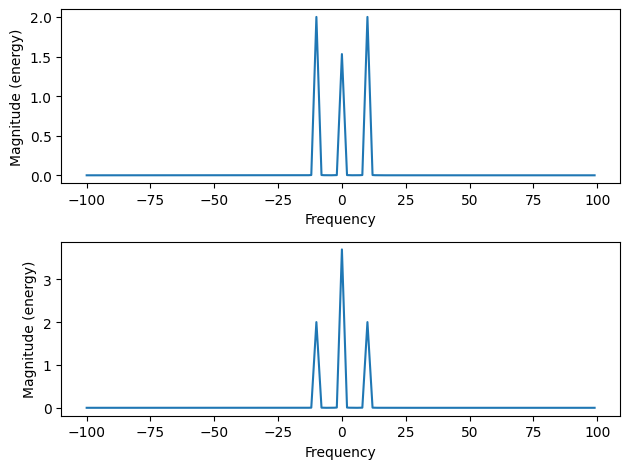

In [3]:
# WRITE YOUR CODE HERE:
import numpy as np

plot1 = x * np.cos(2*np.pi*5*t)
plot2 = x * np.sin(2*np.pi*5*t)

plt.figure()
plt.subplot(2,1,1)

plt.magnitude_spectrum(plot1, Fs=fs, sides="twosided")

plt.subplot(2,1,2)

plt.magnitude_spectrum(plot2, Fs=fs, sides="twosided")

plt.tight_layout()
plt.show()


## IDK why the plot is wrong?!?!?

*If done correctly, the plots should look something like [this](Figurer/task3a_sol.png).*

ANSWER THEORY QUESTIONS HERE:

<!--The sine and cosine components of $x(t)$ with amplitudes $A_x$ and $A_y$ can be combined in the complex plane to create a phasor $\boldsymbol{A} = A \cdot e^{j\phi} = A_x + j\cdot A_y$.-->


We have now explored the effects of multiplying a signal $x(t)$ with another sinusoid, but what happens when we multipy $x(t)$ with a complex complex signals? Two-sided frequency spectrums are especially relevant when studying complex signals as the frequency spectrum of a complex signal is typically not symmetrical around $f=0\text{ Hz}$, conrary to real-valued signals. 

Complex values can be created in Python by using the imaginary unit vector `j`:
```Python
z1 = x + 1j *y  # Cartesian coordinates
z2 = r*np.exp(1j*phi)  # Polar coordinates
```

## b) 

Use Python to combine a sine and cosine function the complex plane to create a new complex signal $z_1(t) = \cos(-2\pi \cdot f \cdot t) + j \cdot \sin(-2\pi \cdot f \cdot t)$ for $f=5\text{ Hz}$. Then, create a plot which shows the magnitude spectrum of both $z_1(t)$ and $x(t)\cdot z_1(t)$.



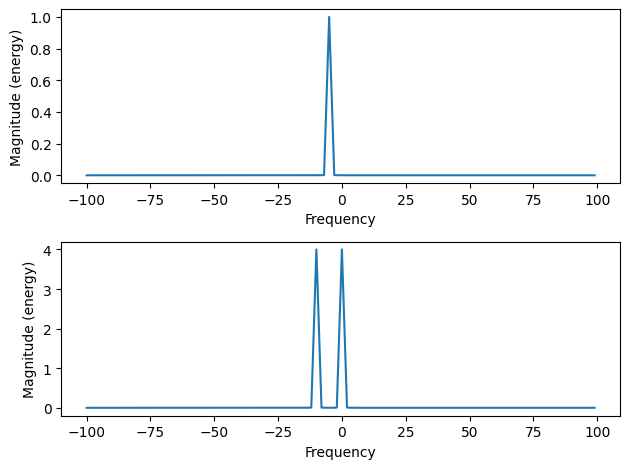

In [4]:
# WRITE YOUR CODE HERE:
import numpy as np
f = 5 #hz
z1 = np.cos(-2*np.pi*f*t) + 1j*np.sin(-2*np.pi*f*t)

plt.figure()
plt.subplot(2,1,1)
plt.magnitude_spectrum(z1, Fs=fs, sides="twosided")

plt.subplot(2,1,2)
plt.magnitude_spectrum(x*z1, Fs=fs, sides="twosided")

plt.tight_layout()
plt.show()


*If done correctly, the plots should look something like [this](Figurer/task3b_sol.png).*

## c) 
Use Python to combine a sine and cosine function the complex plane to create a new complex signal $z_2(t) = \cos(2\pi \cdot t) + j \cdot \sin(2\pi \cdot t)$. Then, create a plot which shows the magnitude spectrum of both $z_2(t)$ and $x(t)\cdot z_2(t)$.


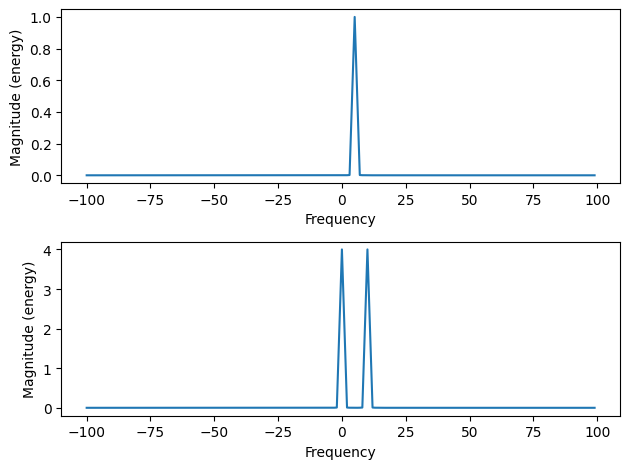

In [5]:
# WRITE YOUR CODE HERE:

z2 = np.cos(2*np.pi*5*t) + 1j*np.sin(2*np.pi*5*t) #Added 5hz to the signal

plt.figure()
plt.subplot(2,1,1)
plt.magnitude_spectrum(z2, Fs=fs, sides="twosided")

plt.subplot(2,1,2)
plt.magnitude_spectrum(x*z2, Fs=fs, sides="twosided")

plt.tight_layout()
plt.show()

*If done correctly, the plots should look something like [this](Figurer/task3c_sol.png).*

As we se seen in the plots from problem **b)** and **c)**, mixing a signal $x(t)$ with a complex rotating vector rotating at a speed of $f$ cycles per second, will shift the entire frequency spectrum of $x(t)$ by $f$ Hz. If $f$ is a negative number, the frequency shift is towards the negative side of the spectrum. 

Calculating the mean of any signal can be viewed as extracting only the $0 \text{ Hz}$ frequency component (i.e. the constant term) while cancelling all other frequency components. Calculating the mean of a signal which has had it's frequency content shifted by $-f\text{ Hz}$ will therefore produce a complex phasor $\boldsymbol{a_k}$ which tells us the manitude and phase of the complex exponential $\boldsymbol{a_f} \cdot e^{j2\pi \cdot f \cdot t}$ embedded within the signal $x(t)$. Further, assuming we already know that $x(t)$ is a real-valued signal, the magnitude $A$ and phase $\phi$ of the sinusoid with freqeuncy $f \text{ Hz}$ can be inferred:

$$\begin{align}
A &= 2\cdot |\boldsymbol{a_f}| \\
\phi &= \angle \  \boldsymbol{a_f} 
\end{align}
$$


## d)
Complete the python-function `extract_sinusoid` which takes two arrays `x` and `t` representing a signal $x(t)$, in addition to the frequency `f` to extract. The function should use downconversion together with averaging to find the magnitude and phase of the component sinusoid with frequency `f` $\text{Hz}$ contained within $x(t)$.

In [6]:
def extract_sinusoid(x, t, f):
    z = x * np.exp(-2j * np.pi * f * t)
    mean_z = np.mean(z)
    
    mag_f = 2 * np.abs(mean_z)
    phase_f = np.angle(mean_z)
    return mag_f, phase_f




The calculations we have performed in task **d)** are the essence of fourier transformation / fourier series decomposition. Performing a fourier series decomposition of a signal $x(t)$ involves repeating such a sinusoid extraction for *all* possible frequency components. Described mathematically: 

###  $$ \boldsymbol{A}_f = \frac{1}{T}\int_0^T x(t)\cdot \left( \cos(2\pi \cdot f \cdot t ) + j \sin(2\pi \cdot f \cdot t) \right) dt,\ \ \ f = \frac{k}{T} $$

for ***all*** integers $k \in \mathbb{Z}$.

## e)

Use the function in **d)** to calculate the magnitude and phase of the 5 first sine wave components in a sawtooth wave. One period of a sawtooth wave can be created using [`linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html). 

In [9]:
import numpy as np
from scipy.signal import sawtooth
t = np.linspace(0, 1, 1000, endpoint=False) # 200 timestamps in 1 second (fs=200)
xt = np.linspace(-1, 1, 1000, endpoint=False) # One period of sawtooth wave
# WRITE YOUR CODE HERE:


for f in range(1, 5):
    func = extract_sinusoid(sawtooth(2*np.pi*5*t), t, f)
    print(func)

(9.087241581389566e-17, 1.6490674673161745)
(4.8322130328186025e-17, 1.8692952583810758)
(1.271057486462604e-16, 1.1071487177940904)
(1.6633378991627446e-16, 1.9195673303788037)
